# Instructions
- Before running the jupyter notebook, don't forget to copy it into your drive **(`File` => `Save a copy in Drive`)**. *Failing to do this step may result in losing the progress of your code.*
- Change your resource type to GPU before progressing **(`Runtime` => `Change runtime time` => `T4 GPU`).**
- There are six steps for this exercise (including step 0, the preperation step). **You will do the following two tasks as detailed under each step, and we will grade both parts:**
  - **Coding Exercises:** You will complete the the code blocks denoted by **`TODO:`**.
  - **Questions to Answer:** You will answer questions denoted by **`Q:`**.
- For the submission of the assignment, please download this notebook as a **Python file**, named `A2S3.py`.

# Step 0: Preperation

**Step 0.1:** Install dependency
- This step could take a while.

**Step 0.2:** Mount data and files to your drive.
- You will see a few popup windows asking for your authorization for this notebook to access your Google Drive files. You need to say yes to all of them.

In [ ]:
# Step 0.1: Install dependency and download codebase
!pip install torch transformers datasets tqdm gdown==v4.6.3
!mkdir checkpoints

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 536.6/536.6 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.3/38.3 MB 26.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 15.4 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 10.0.1
    Uninstalling pyarrow-10.0.1:
      Successfully uninstalled pyarrow-10.0.1
  Attempting uninstall: gdown
    Found existing installation: gdown 4.7.3
    Uninstalling gdown-4.7.3:
      Successfully uninstalled gdown-4.7.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ibis-framework 7.1.0 requires pyarrow<15,>=2, but you have pyarrow 15.0.0 which is incompatible.


In [ ]:
# Step 0.2: Mount data and files to your drive.
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Step 1: Defining PyTorch Dataset and Dataloader

First, you will implement a dataset class (named `SST2Dataset`) for processing the SST-2 dataset. You can find details of the basics of Dataset and Dateloader in this [tutorial](https://pytorch.org/tutorials/beginner/basics/data_tutorial.html).

We defined the `SST2Example` class for you, which is used to convert a dict of raw data into an SST2Example object that contains a text and label.

In [ ]:
# Load necessary packages
from dataclasses import dataclass
from typing import List, Tuple

import torch
from torch.utils.data import Dataset, DataLoader
from transformers import PreTrainedTokenizerFast, AutoTokenizer
from datasets import load_dataset

######################################################
#  The following code is given to you.
######################################################

@dataclass
class SST2Example:
    """
    Convert a dict of raw data into an SST2Example object that contains a text and label.
    If you're interested, you can find descriptions of dataclass at https://docs.python.org/3/library/dataclasses.html
    """
    text: str
    label: int  # 0 for negative, 1 for positive

    @staticmethod
    def from_dict(data: dict):
        text = data['text']
        label = data['label']

        return SST2Example(
            text=text,
            label=label,
        )


def initialize_datasets(tokenizer: PreTrainedTokenizerFast) -> dict:
    """
    Initialize the dataset objects for all splits based on the raw data.
    :param tokenizer: A tokenizer used to prepare the inputs for a model (see details in https://huggingface.co/docs/transformers/main_classes/tokenizer).
    :return: A dictionary of the dataset splits.
    """
    raw_data = load_dataset("gpt3mix/sst2")
    split_datasets = {}

    for split_name in raw_data.keys():
        split_data = list(raw_data[split_name])

        split_datasets[split_name] = SST2Dataset(tokenizer, split_data)

    return split_datasets

## **Coding Exercises** for Step 1:
Below, we provide a skeleton for creating a SST-3 Dataset object. **You will complete the following code blocks denoted by `TODO:`.**

In [ ]:
class SST2Dataset(Dataset):
    """
    Create a customized dataset object for SST-2.
    A custom Dataset class must implement three functions: __init__, __len__, and __getitem__.
    You can find a detailed tutorial on Dataset at https://pytorch.org/tutorials/beginner/basics/data_tutorial.html.
    """
    tokenizer: PreTrainedTokenizerFast = None

    def __init__(self, tokenizer: PreTrainedTokenizerFast, raw_data_list: List[dict]):
        SST2Dataset.tokenizer = tokenizer
        self.sample_list = [SST2Example.from_dict(data) for data in raw_data_list]

    def __len__(self):
        """
        Get the number of items in the dataset.
        """
        # TODO: return the number of samples in sample_list.
        return len(self.sample_list)

    def __getitem__(self, idx):
        """
        Get the idx-th item from the dataset.
        """
        # TODO: return the idx-th item in sample_list.
        return self.sample_list[idx]

    def __iter__(self):
        """
        Get an iterator for the dataset.
        """
        # TODO: return an iterator for sample_list.
        return iter(self.sample_list)

    @staticmethod
    def collate_fn(batched_samples: List[SST2Example]) -> dict:
        """
        Encode samples in batched_samples: tokenize the input texts, and turn labels into a tensor.
        :param batched_samples: A list of SST2Example samples.
        :return: A dictionary of encoded texts and their corresponding labels (in tensors).
        """
        # TODO: collect all input texts from batched_samples into a list.
        batched_text = [sample.text for sample in batched_samples]

        # TODO: collect all labels from batched_samples into a list.
        batched_label = [sample.label for sample in batched_samples]

        # Tokenize the input texts.
        text_encoding = SST2Dataset.tokenizer(batched_text,
                                              padding=True,
                                              max_length=512,
                                              truncation=True,
                                              return_tensors="pt")

        # TODO: convert data type of the labels to torch.long (Hint: using torch.LongTensor).
        label_encoding = torch.LongTensor(batched_label)

        # TODO: return dictionary of encoded texts and labels.
        return {
            "text_encoding": text_encoding,
            "label_encoding": label_encoding,
        }

## **Questions to Answer** for Step 1:
**Answer these questions in your write-up report.**
- **Q1.1:** Explain the usages of the following arguments when you encode the input texts: `padding`, `max_length`, `truncation`, `return_tensors`
- **Q1.2:** For the above arguments, explain what are the potential advantages of setting them to the default values we provide.

# Step 2: Loading Data
Here, you will load the data using the Dataloader of the dataset you built from the previous step.

## **Coding Exercises** for Step 2:
You will complete the following code blocks denoted by `TODO:`.

In [34]:
"""
Load train / validation / test dataset, using `initialize_datasets` in `dataset.py`.
"""
# TODO: load pre-trained tokenizer for Roberta-base from transformers library.
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# TODO: load datasets using initialize_datasets.
datasets = initialize_datasets(tokenizer)

# TODO: get the first data point in your validation dataset.
# Hint: (for you to debug) you returned data point should look like `SST2Example(text="It 's a lovely ...", label=0)`
val_first_element = datasets['validation'][0]

print("first element from validation: ", val_first_element)

# TODO: get the length of train, validation, and test datasets using `datasets` variable.
length_train = len(datasets['train'])
length_val = len(datasets['validation'])
length_test = len(datasets['test'])

print("length_train: ", length_train)
print("length_val: ", length_val)
print("length_test: ", length_test)

"""
To load batch of samples from `torch.Dataset` during training / inference, we use `DataLoader` class.
Below, we provide an example of loading a dataloader for the validation split of SST-2.
"""
validation_dataloader = DataLoader(datasets['validation'],
                                   batch_size=64,
                                   shuffle=False,
                                   collate_fn=SST2Dataset.collate_fn,
                                   num_workers=2)

# TODO: load the first batch of samples from the validation dataset
# Hint: use iterator!
batch = next(iter(validation_dataloader))
print("input_id shape: ", batch.get('text_encoding').get('input_ids').shape)
print("attention_mask shape: ", batch.get('text_encoding').get('attention_mask').shape)
print("label_encoding shape: ", batch.get('label_encoding').shape)
print("batch: ", batch)

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/6920 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/872 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/1821 [00:00<?, ? examples/s]

first element from validation:  SST2Example(text="It 's a lovely film with lovely performances by Buy and Accorsi .", label=0)
length_train:  6920
length_val:  872
length_test:  1821
input_id shape:  torch.Size([64, 45])
attention_mask shape:  torch.Size([64, 45])
label_encoding shape:  torch.Size([64])
batch:  {'text_encoding': {'input_ids': tensor([[    0,   243,   128,  ...,     1,     1,     1],
        [    0,  2409,   114,  ...,     1,     1,     1],
        [    0,   250,  3279,  ...,     1,     1,     1],
        ...,
        [    0,   250, 10727,  ...,     1,     1,     1],
        [    0,   713, 19907,  ...,     1,     1,     1],
        [    0,   250, 16044,  ...,     1,     1,     1]]), 'attention_mask': tensor([[1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        ...,
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0],
        [1, 1, 1,  ..., 0, 0, 0]])}, 'label_encoding': tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0

## **Questions to Answer** for Step 2:

**Answer these questions in your write-up report.**

- **Q2.1:** What are the lengths of train, validation, test datasets?

- **Q2.2:** Explain the role of each of the following parameters `batch_size`, `shuffle`, `collate_fn`, `num_workers` given to the `DataLoader` in the above code block. (Hint: You can refer to the Pytorch tutorial on Data processing in the [official website](https://pytorch.org/tutorials/beginner/data_loading_tutorial.html).)

- **Q2.3:** Write the *type* and *shape* (if the type is tensor) of `input_ids`, `attention_mask`, and `label_encoding` in `batch` and explain *what do these elements represent*.

# Step 3: Training and Evaluation

In [35]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torch.optim import Optimizer, AdamW
from tqdm.notebook import tqdm
from transformers import AutoTokenizer, AutoModelForSequenceClassification

## **Coding Exercises** for Step 3:
Here, we provide a skeleton for two functions, `train_one_epoch` and `evaluate`. **You will complete code blocks denoted by `TODO:`.**

In [36]:
def train_one_epoch(model: nn.Module, dataloader: DataLoader, optimizer: Optimizer, epoch: int):
    """
    Train the model for one epoch.
    :param model: A pre-trained model loaded from transformers. (e.g., RobertaForSequenceClassification https://huggingface.co/docs/transformers/v4.37.0/en/model_doc/roberta#transformers.RobertaForSequenceClassification)
    :param dataloader: A train set dataloader for SST2Dataset.
    :param optimizer: An instance of Pytorch optimizer. (e.g., AdamW https://pytorch.org/docs/stable/generated/torch.optim.AdamW.html)
    :param epoch: An integer denoting current epoch.
    Trains model for one epoch.
    """
    # TODO: set the model to the training mode.
    model.train()

    all_predictions = []
    all_labels = []
    with tqdm(dataloader, desc=f"Train Ep {epoch}", total=len(dataloader)) as tq:
        for batch in tq:
            # TODO: retrieve the data from your batch and send it to GPU.
            # Hint: model.device should point to 'cuda' as you set it as such in the main function below.
            text_encoding = batch['text_encoding'].to(model.device)
            label_encoding = batch['label_encoding'].to(model.device)

            # TODO: Compute loss by running model with text_encoding and label_encoding.
            loss = model(**text_encoding, labels=label_encoding).loss

            predictions = torch.argmax(logits, dim=-1).tolist()
            labels = label_encoding.tolist()
            all_predictions += predictions
            all_labels += labels

            # TODO: compute gradients and update parameters using optimizer.
            # Hint: you need three lines of code here!
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            tq.set_postfix({"loss": loss.detach().item()}) # for printing better-looking progress bar

    all_predictions = torch.Tensor(all_predictions)
    all_labels = torch.Tensor(all_labels)
    accuracy = compute_accuracy(all_predictions, all_labels)

    print(f"Training Accuracy: {accuracy}")

In [37]:
def evaluate(model: nn.Module, dataloader: DataLoader) -> float:
    """
    Evaluate model on the dataloader and compute the accuracy.
    :param model: A language model loaded from transformers. (e.g., RobertaForSequenceClassification https://huggingface.co/docs/transformers/v4.37.0/en/model_doc/roberta#transformers.RobertaForSequenceClassification)
    :param dataloader: A validation / test set dataloader for SST2Dataset
    :return: A floating number representing the accuracy of model in the given dataset.
    """
    # TODO: set the model to the evaluation mode.
    model.eval()

    all_predictions = []
    all_labels = []
    with tqdm(dataloader, desc=f"Eval", total=len(dataloader)) as tq:
        for batch in tq:
            with torch.no_grad():
                # TODO: retrieve the data from your batch and send it to GPU.
                # Hint: model.device should point to 'cuda' as you set it as such in the main function below.
                text_encoding = batch['text_encoding'].to(model.device)
                label_encoding = batch['label_encoding'].to(model.device)

                # TODO: inference with model and compute logits.
                # Hint: logit should be of size (batch_size, 2)
                logits = model(**text_encoding).logits

                # TODO: compute list of predictions and list of labels for the current batch
                 # Hint: should be a list [0, 1, ...] of predicted labels
                predictions = torch.argmax(logits, dim=-1).tolist()
                 # Hint: should be a list [0, 1, ...] of ground-truth labels
                labels = label_encoding.tolist()

                all_predictions += predictions
                all_labels += labels

    # compute accuracy
    all_predictions = torch.Tensor(all_predictions)
    all_labels = torch.Tensor(all_labels)
    accuracy = compute_accuracy(all_predictions, all_labels)

    print(f"Validation Accuracy: {accuracy}")
    return accuracy


def compute_accuracy(predictions: torch.Tensor, labels: torch.Tensor) -> float:
    """
    Given two tensors predictions and labels, compute the accuracy.
    :param predictions: torch.Tensor of size (N,)
    :param labels: torch.Tensor of size (N,)
    :return: A floating number representing the accuracy
    """
    assert predictions.size(-1) == labels.size(-1)

    # TODO: compute accuracy
    accuracy = (predictions == labels).sum().item() / len(labels)
    return accuracy

## **Questions to Answer** for Step 3:
**Answer these questions in your write-up report.**
- **Q3.1:** For the three lines of code you implemented for computing gradients and updating parameters using optimizer, explain what each of the lines does, respectively.

- **Q3.2:** Explain what setting the model to training and evaluation modes do, respectively.

- **Q3.3:** Explain what `with torch.no_grad()` does in the `evaluation()` function.

# Step 4: Main Training Loop

The main function uses all the functions implemented above to learn a model for certain number of epochs and evaluate it. Read through the comments and implement `main` that fine-tunes the RoBERTa-based on SST-2.

## **Coding Exercises** for Step 4:
Here, we provide a skeleton for the `main` function. **You will complete code blocks denoted by `TODO:`.**

In [38]:
torch.manual_seed(64)

def main():
    # hyper-parameters (we provide initial set of values here, but you can modify them.)
    batch_size = 64
    learning_rate = 5e-5
    num_epochs = 10
    model_name = "roberta-base"

    # TODO: load pre-trained model and corresponding tokenizer (given model_name above).
    tokenizer = AutoTokenizer.from_pretrained(model_name)
    model = AutoModelForSequenceClassification.from_pretrained(model_name)

    # load model on GPU.
    model = model.cuda()

    # TODO: initialize the AdamW optimizer with optional arguments: lr=learning_rate, eps=1e-8
    optimizer = AdamW(model.parameters(), lr=learning_rate, eps=1e-8)

    # TODO: load datasets.
    datasets = initialize_datasets(tokenizer)

    # TODO: initialize that training and evaluation (validation / test) dataloaders.
    # Hint: you should use the validation dataset during hyperparameter tuning,
    # and evaluate the model on the test set once after you finalize the design choice of your model.
    # Hint: you should shuffle the training data, but not the validation data.
    train_dataloader = DataLoader(datasets['train'],
                                  batch_size=batch_size,
                                  shuffle=True,
                                  collate_fn=SST2Dataset.collate_fn,
                                  num_workers=2)
    validation_dataloader = DataLoader(datasets['validation'],
                                       batch_size=batch_size,
                                       shuffle=False,
                                       collate_fn=SST2Dataset.collate_fn,
                                       num_workers=2)

    # training loop.
    best_acc = 0.0
    for epoch in range(1, num_epochs + 1):
        train_one_epoch(model, train_dataloader, optimizer, epoch)
        valid_acc = evaluate(model, validation_dataloader)

        # TODO: if the newly trained model checkpoint is better than the previously
        # saved checkpoint, save the new model in `./checkpoints` folder.
        # Hint: remember to update best_acc to the accuracy of the best model so far.
        if valid_acc > best_acc:
            best_acc = valid_acc
            torch.save(model.state_dict(), f"./checkpoints/best_model.pth")


In [40]:
# Run the main training loop.
# NOTE: if implemented well, each training epoch will take less than 2 minutes.
main()

model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.out_proj.weight', 'classifier.out_proj.bias', 'classifier.dense.weight', 'classifier.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

## **Questions to Answer** for Step 4:
**Answer these questions in your write-up report.**
- **Q4.1:** With the following default hyperparameters we provide, plot both training and validation loss curves across 10 epochs in a single plot (x-axis: num of the epoch; y-axis: acc). You can draw this plot with a Python script or other visualization tools like Google Sheets.

  - batch_size = 64
  - learning_rate = 5e-5
  - num_epochs = 20
  - model_name = "roberta-base"

- **Q4.2:** Describe the behaviors of the training and validation loss curves as you plotted above. At which epoch does the model achieve the best accuracy on the training dataset? What about the validation dataset? Do training and validation curves have the same trend? Why does the current trend happen?

- **Q4.3:** Why do you shuffle the training data but not the validation data?

- **Q4.4:** Explain the functionality of optimizers.

- **Q4.5:** Experiment with two other optimizers defined in `torch.optim` for the training the model with the default hyperparameters we give you. What's the difference between `AdamW` and these two new optimizers? Back up your claims with emperical evidence.

- **Q4.6:** Experiment with different combinations of `batch_size`, `learning_rate`, and `num_epochs`. Your goal is to pick the final, best model checkpoint based on the validation dataset accuracy. Describe the strategy you used to try different combinations of hyperparameters. Why did you use this strategy?

- **Q4.7:** What are the `batch_size`, `learning_rate`, and `num_epochs` of the best model checkpoint that you picked? What are the training accuracy and validation accuracy?

# Step 5: Testing the Final Model

## **Coding Exercises** for Step 5:
Here, you load your best trained model from `./checkpoints/` and report the test set accuracy. **You will complete the following code blocks denoted by `TODO:`.**



In [ ]:
tokenizer = AutoTokenizer.from_pretrained("roberta-base")

# TODO: Load your best trained model from `./checkpoints/` and report the test set accuracy.
model = AutoModelForSequenceClassification.from_pretrained("roberta-base")

datasets = initialize_datasets(tokenizer)
# TODO: Load the test dataset
test_dataloader = DataLoader(datasets['test'],
                             batch_size=64,
                             shuffle=False,
                             collate_fn=SST2Dataset.collate_fn,
                             num_workers=2)

# TODO: evaluate the model on the test set
model.load_state_dict(torch.load("./checkpoints/best_model.pth"))
model = model.cuda()
test_acc = evaluate(model, test_dataloader)

## **Questions to Answer** for Step 5:
**Answer these questions in your write-up report.**
- **Q5.1:** What's the test set accuracy of the best model?

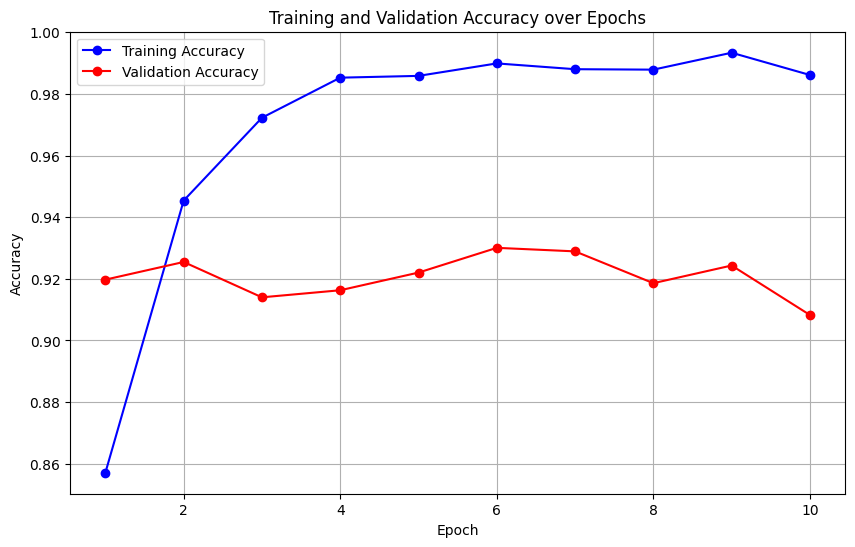

In [1]:
import matplotlib.pyplot as plt

# Training and validation accuracy data
training_accuracies = [
    0.8570809248554914, 0.9453757225433526, 0.9722543352601156, 0.9852601156069364,
    0.9858381502890173, 0.9898843930635838, 0.9880057803468208, 0.9878612716763006,
    0.9933526011560694, 0.9861271676300578
]
validation_accuracies = [
    0.9197247706422018, 0.9254587155963303, 0.9139908256880734, 0.9162844036697247,
    0.9220183486238532, 0.930045871559633, 0.9288990825688074, 0.9185779816513762,
    0.9243119266055045, 0.908256880733945
]

# Plotting the accuracies
epochs = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracies, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Train Ep 1: 100%
109/109 [01:10<00:00, 1.97it/s, loss=0.678]
Training Accuracy: 0.5222543352601156
Eval: 100%
14/14 [00:02<00:00, 6.53it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 2: 100%
109/109 [01:14<00:00, 1.85it/s, loss=0.715]
Training Accuracy: 0.5216763005780347
Eval: 100%
14/14 [00:02<00:00, 6.24it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 3: 100%
109/109 [01:16<00:00, 1.43it/s, loss=0.658]
Training Accuracy: 0.5106936416184971
Eval: 100%
14/14 [00:02<00:00, 6.34it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 4: 100%
109/109 [01:16<00:00, 1.48it/s, loss=0.715]
Training Accuracy: 0.5177745664739885
Eval: 100%
14/14 [00:02<00:00, 6.26it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 5: 100%
109/109 [01:16<00:00, 1.32it/s, loss=0.691]
Training Accuracy: 0.5248554913294797
Eval: 100%
14/14 [00:02<00:00, 6.30it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 6: 100%
109/109 [01:16<00:00, 1.45it/s, loss=0.676]
Training Accuracy: 0.5190751445086705
Eval: 100%
14/14 [00:02<00:00, 6.28it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 7: 100%
109/109 [01:16<00:00, 1.49it/s, loss=0.741]
Training Accuracy: 0.5154624277456648
Eval: 100%
14/14 [00:02<00:00, 6.20it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 8: 100%
109/109 [01:15<00:00, 1.42it/s, loss=0.692]
Training Accuracy: 0.5206647398843931
Eval: 100%
14/14 [00:02<00:00, 6.12it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 9: 100%
109/109 [01:16<00:00, 1.94it/s, loss=0.657]
Training Accuracy: 0.5221098265895954
Eval: 100%
14/14 [00:02<00:00, 6.24it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 10: 100%
109/109 [01:16<00:00, 1.39it/s, loss=0.666]
Training Accuracy: 0.5160404624277457
Eval: 100%
14/14 [00:02<00:00, 6.02it/s]
Validation Accuracy: 0.5091743119266054

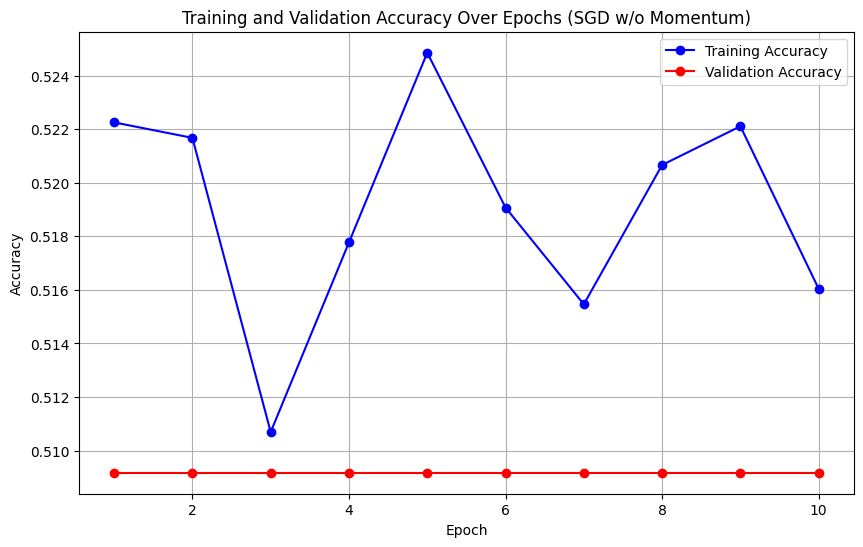

In [2]:
import matplotlib.pyplot as plt

# Data
epochs = list(range(1, 11))
training_accuracies = [
    0.5222543352601156, 0.5216763005780347, 0.5106936416184971, 0.5177745664739885,
    0.5248554913294797, 0.5190751445086705, 0.5154624277456648, 0.5206647398843931,
    0.5221098265895954, 0.5160404624277457
]
validation_accuracies = [
    0.5091743119266054, 0.5091743119266054, 0.5091743119266054, 0.5091743119266054,
    0.5091743119266054, 0.5091743119266054, 0.5091743119266054, 0.5091743119266054,
    0.5091743119266054, 0.5091743119266054
]

# Plot
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracies, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy Over Epochs (SGD w/o Momentum)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
Train Ep 1: 100%
109/109 [01:20<00:00, 1.83it/s, loss=0.674]
Training Accuracy: 0.5105491329479769
Eval: 100%
14/14 [00:02<00:00, 6.40it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 2: 100%
109/109 [01:19<00:00, 1.64it/s, loss=0.667]
Training Accuracy: 0.5089595375722543
Eval: 100%
14/14 [00:02<00:00, 6.33it/s]
Validation Accuracy: 0.4908256880733945
Train Ep 3: 100%
109/109 [01:19<00:00, 1.83it/s, loss=0.673]
Training Accuracy: 0.5096820809248555
Eval: 100%
14/14 [00:02<00:00, 6.36it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 4: 100%
109/109 [01:19<00:00, 1.91it/s, loss=0.695]
Training Accuracy: 0.5067919075144509
Eval: 100%
14/14 [00:02<00:00, 6.33it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 5: 100%
109/109 [01:19<00:00, 1.72it/s, loss=0.693]
Training Accuracy: 0.5144508670520231
Eval: 100%
14/14 [00:02<00:00, 6.20it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 6: 100%
109/109 [01:19<00:00, 1.71it/s, loss=0.66]
Training Accuracy: 0.5096820809248555
Eval: 100%
14/14 [00:02<00:00, 6.31it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 7: 100%
109/109 [01:19<00:00, 1.92it/s, loss=0.754]
Training Accuracy: 0.5122832369942196
Eval: 100%
14/14 [00:02<00:00, 6.39it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 8: 100%
109/109 [01:18<00:00, 1.83it/s, loss=0.688]
Training Accuracy: 0.513150289017341
Eval: 100%
14/14 [00:02<00:00, 6.32it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 9: 100%
109/109 [01:19<00:00, 1.87it/s, loss=0.681]
Training Accuracy: 0.5095375722543353
Eval: 100%
14/14 [00:02<00:00, 6.32it/s]
Validation Accuracy: 0.5091743119266054
Train Ep 10: 100%
109/109 [01:18<00:00, 1.83it/s, loss=0.726]
Training Accuracy: 0.5095375722543353
Eval: 100%
14/14 [00:02<00:00, 6.28it/s]
Validation Accuracy: 0.5091743119266054

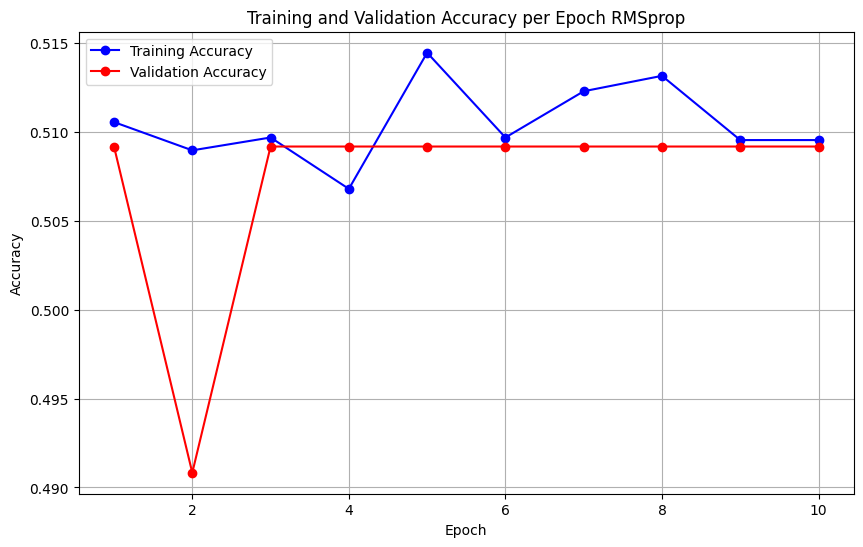

In [4]:
import matplotlib.pyplot as plt

# Training and validation accuracy data
training_accuracies = [
    0.5105491329479769, 0.5089595375722543, 0.5096820809248555, 
    0.5067919075144509, 0.5144508670520231, 0.5096820809248555, 
    0.5122832369942196, 0.513150289017341, 0.5095375722543353, 
    0.5095375722543353
]
validation_accuracies = [
    0.5091743119266054, 0.4908256880733945, 0.5091743119266054, 
    0.5091743119266054, 0.5091743119266054, 0.5091743119266054, 
    0.5091743119266054, 0.5091743119266054, 0.5091743119266054, 
    0.5091743119266054
]

# Plotting
epochs = range(1, 11)
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracies, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracies, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy per Epoch RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Eval: 100%
29/29 [00:05<00:00, 6.59it/s]
Validation Accuracy: 0.9478308621636463

0.941790225151016 64 2e-5 20

SyntaxError: leading zeros in decimal integer literals are not permitted; use an 0o prefix for octal integers (938782466.py, line 3)